In [2]:
# Make the following code support python2 and python3
from __future__ import division, print_function, unicode_literals

# Check if the version of python is 3.5 and above
import sys
assert sys.version_info >= (3, 5)

# Check to see if sklearn is version 0.20 and above
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os 

# The result obtained after each run is the same as that of this notebook
np.random.seed(42) 

# Make matplotlib diagrams work better
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setting the route to save the image
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    '''
    Run to save automatic pictures
    
    fig_id : Picture Name
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# Ignore the useless warnings (Scipy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
df = pd.read_excel("总数据7.13修改版.xlsx")

In [5]:
df.head()

,Sample type,天然：1,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
0,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.09,NaN,NaN,NaN,29.61,NaN,NaN,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.18,NaN,NaN,NaN,29.17,NaN,NaN,22.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.41,NaN,NaN,NaN,24.42,NaN,NaN,22.53,NaN,NaN,NaN,NaN,5.16,NaN,NaN,NaN,0.000
3,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.37,NaN,NaN,NaN,22.81,NaN,NaN,22.12,NaN,NaN,NaN,NaN,7.61,NaN,NaN,NaN,0.000
4,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.47,NaN,NaN,NaN,18.96,NaN,NaN,22.49,NaN,NaN,NaN,NaN,10.81,NaN,NaN,NaN,0.106


In [6]:
df.columns

Index(['Sample type', '天然：1', 'SiO2', 'TiO2', 'Al2O3', 'Cr2O3', 'FeOtot',
       'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'NiO', 'ZnO', 'Li2O',
       'ZrO2', 'V2O5', 'Fe3+/Fetot'],
      dtype='object')

In [7]:
# 建立副本，以免修改原数据
df_edit = df.iloc[:, 2:]

In [8]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 17 columns):
SiO2          390 non-null float64
TiO2          354 non-null float64
Al2O3         364 non-null float64
Cr2O3         348 non-null float64
FeOtot        390 non-null float64
MnO           330 non-null float64
MgO           379 non-null float64
CaO           390 non-null float64
Na2O          380 non-null float64
K2O           169 non-null float64
P2O5          5 non-null float64
NiO           171 non-null float64
ZnO           15 non-null float64
Li2O          5 non-null float64
ZrO2          3 non-null float64
V2O5          8 non-null float64
Fe3+/Fetot    390 non-null float64
dtypes: float64(17)
memory usage: 51.9 KB


In [9]:
df_edit.describe()

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
count,390.000000,354.000000,3.640000e+02,348.000000,390.000000,330.000000,3.790000e+02,3.900000e+02,380.000000,1.690000e+02,5.000000,171.000000,1.500000e+01,5.000000,3.000000,8.000000e+00,390.000000
mean,52.588121,0.683474,5.634114e+00,0.804728,5.821023,0.112056,1.436257e+01,1.817262e+01,2.171707,3.023375e-02,0.205200,0.050912,7.260000e+00,7.684000,0.640000,4.200004e-02,0.277177
std,3.169816,1.334923,4.238189e+00,1.418578,7.056935,0.130789,4.487865e+00,5.577510e+00,2.221430,7.362901e-02,0.321835,0.070330,9.673504e+00,0.122558,0.372424,3.600392e-02,0.214405
min,41.620000,0.000000,1.000000e-07,0.000000,0.040000,0.000000,1.000000e-07,1.000000e-07,0.000000,0.000000e+00,0.040000,0.000000,1.000000e-07,7.500000,0.420000,1.000000e-07,0.000000
25%,51.220000,0.090000,2.460000e+00,0.070000,2.542500,0.040000,1.246000e+01,1.780750e+01,1.000000,1.000000e-07,0.055000,0.020000,1.000000e-07,7.621000,0.425000,1.000000e-07,0.154775
50%,52.415000,0.340000,5.795000e+00,0.710000,3.295000,0.090000,1.510000e+01,1.980000e+01,1.570000,5.000000e-03,0.061000,0.040000,1.000000e-07,7.739000,0.430000,5.650000e-02,0.230000
75%,54.777500,0.630000,7.102500e+00,1.160000,6.662500,0.120000,1.637000e+01,2.107250e+01,2.112500,3.000000e-02,0.090000,0.060000,1.292500e+01,7.760000,0.750000,6.925000e-02,0.320000
max,64.960000,9.760000,2.821600e+01,23.670000,54.350000,0.930000,3.975000e+01,2.550000e+01,12.980000,6.300000e-01,0.780000,0.470000,2.690000e+01,7.800000,1.070000,8.400000e-02,1.000000


Saving figure data_describe


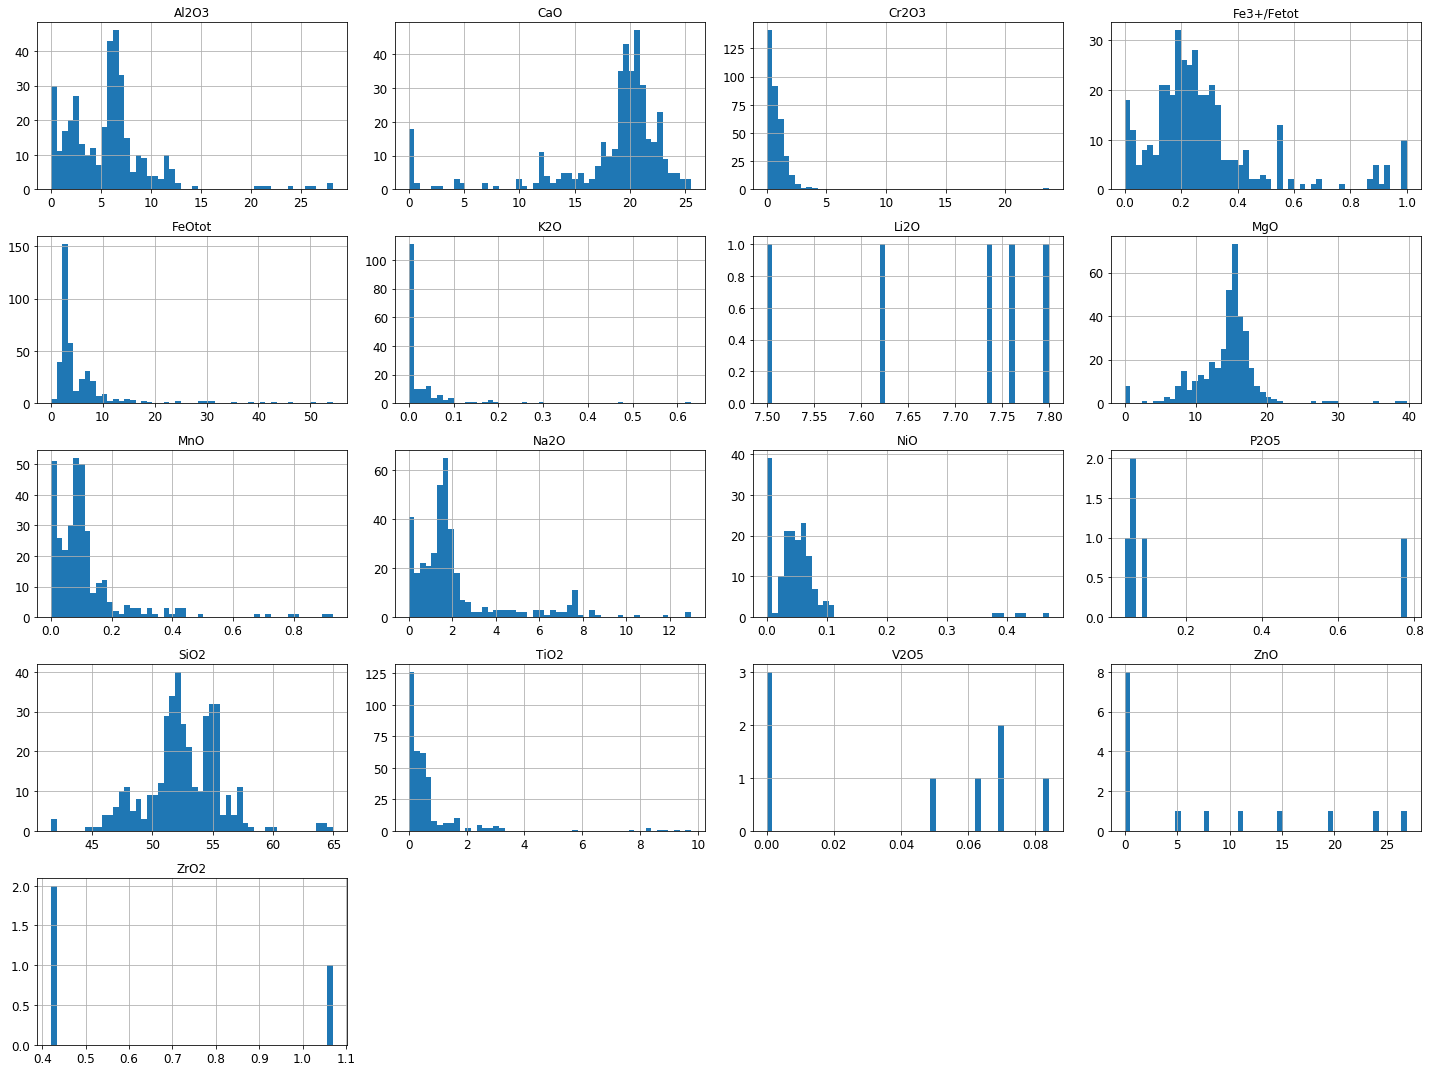

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Represented as a histogram with horizontal coordinates for content and vertical coordinates for quantity
df_edit.hist(bins=50, figsize=(20, 15))
save_fig('data_describe')
plt.show()

In [11]:
# Find the Pearson correlation coefficient between each pair of attributes, i.e., the correlation coefficient matrix
corr_matrix = df_edit.corr()

In [12]:
corr_matrix

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
SiO2,1.000000,-0.147970,0.086674,0.084975,-0.373479,-0.278171,0.053447,-0.298423,0.346860,0.041493,-0.547651,0.101765,-0.901960,0.387234,0.983195,0.291250,0.277212
TiO2,-0.147970,1.000000,-0.056922,-0.152735,-0.040777,-0.007273,-0.139259,0.128355,-0.009840,-0.057670,-0.188904,-0.152378,NaN,0.252945,-0.238957,0.151551,0.105109
Al2O3,0.086674,-0.056922,1.000000,-0.067491,-0.219126,-0.088014,-0.416861,-0.281077,0.262907,-0.039198,-0.416450,-0.007463,NaN,-0.017285,-0.557137,-0.733644,0.398238
Cr2O3,0.084975,-0.152735,-0.067491,1.000000,-0.185514,-0.060642,0.008497,-0.069348,0.173983,-0.045668,NaN,0.029392,NaN,NaN,NaN,0.847341,0.136139
FeOtot,-0.373479,-0.040777,-0.219126,-0.185514,1.000000,0.344348,-0.358755,-0.475406,0.023268,0.080445,0.506131,-0.133151,0.348216,0.004801,0.784918,-0.438791,-0.060955
MnO,-0.278171,-0.007273,-0.088014,-0.060642,0.344348,1.000000,-0.183629,-0.043607,-0.045479,-0.025438,0.618937,-0.152764,NaN,-0.245729,0.594172,0.286214,0.088149
MgO,0.053447,-0.139259,-0.416861,0.008497,-0.358755,-0.183629,1.000000,0.189288,-0.586601,-0.051134,0.375507,0.145662,NaN,0.602549,0.094267,0.411657,-0.423090
CaO,-0.298423,0.128355,-0.281077,-0.069348,-0.475406,-0.043607,0.189288,1.000000,-0.354904,-0.023971,0.576144,-0.015756,0.526712,0.224392,0.147530,0.074784,-0.195911
Na2O,0.346860,-0.009840,0.262907,0.173983,0.023268,-0.045479,-0.586601,-0.354904,1.000000,0.052979,-0.149329,-0.019380,NaN,0.042606,0.054443,-0.672321,0.443645
K2O,0.041493,-0.057670,-0.039198,-0.045668,0.080445,-0.025438,-0.051134,-0.023971,0.052979,1.000000,0.959983,0.254495,NaN,0.240925,NaN,NaN,-0.133499


In [13]:
# View the correlation coefficient for each attribute and target value (only linear relationships are measured),
# close to 1 indicates a strong positive correlation,
# close to -1 indicates a strong negative correlation, close to 0 indicates no linear relationship
corr_matrix["Fe3+/Fetot"].sort_values(ascending=False)

Fe3+/Fetot    1.000000
ZrO2          0.511582
Na2O          0.443645
Al2O3         0.398238
SiO2          0.277212
Li2O          0.220511
Cr2O3         0.136139
NiO           0.132259
TiO2          0.105109
MnO           0.088149
FeOtot       -0.060955
K2O          -0.133499
CaO          -0.195911
V2O5         -0.393636
MgO          -0.423090
P2O5         -0.564129
ZnO          -0.634439
Name: Fe3+/Fetot, dtype: float64

Saving figure corr_four


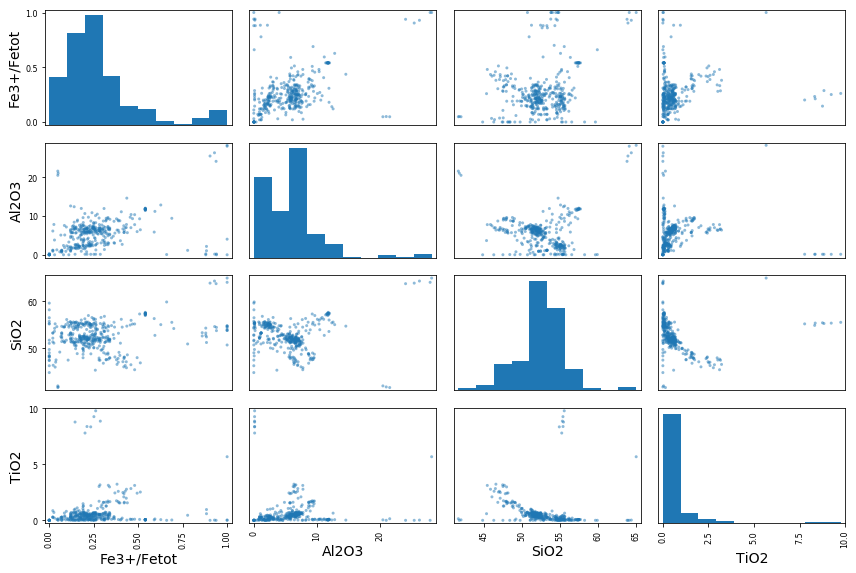

In [14]:
from pandas.plotting import scatter_matrix

# View the distribution of the top four attributes with the largest correlation coefficients
attributes = ['Fe3+/Fetot', 'Al2O3', 'SiO2', 'TiO2']
scatter_matrix(df_edit[attributes], figsize=(12, 8))
save_fig('corr_four')

In [15]:
from sklearn.model_selection import train_test_split

# Division of training and test sets
train_set, test_set = train_test_split(df_edit, test_size=0.2, random_state=42)
# drop() creates a backup of the data and does not affect train_set,
# major_el is the feature value and major_el_labels is the label value
major_el = train_set.drop("Fe3+/Fetot", axis=1)
major_el_labels = train_set["Fe3+/Fetot"].copy()
major_el_test = test_set.drop("Fe3+/Fetot", axis=1)
major_el_test_labels = test_set["Fe3+/Fetot"].copy()

In [16]:
major_el.shape

(312, 16)

In [17]:
major_el_test.shape

(78, 16)

In [18]:
# Check which column contains a null value
major_el.isnull().any(axis=0)

SiO2      False
TiO2       True
Al2O3      True
Cr2O3      True
FeOtot    False
MnO        True
MgO        True
CaO       False
Na2O       True
K2O        True
P2O5       True
NiO        True
ZnO        True
Li2O       True
ZrO2       True
V2O5       True
dtype: bool

In [20]:
# Interpolate the null value of the features in the training set to zero
major_el.fillna(0, inplace=True)
major_el.head()

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5
291,51.71,0.80,7.16,0.62,2.97,0.68,14.72,19.91,2.20,0.000000e+00,0.0,0.06,0.0,0.0,0.0,0.0
63,51.22,0.47,6.35,0.70,3.09,0.08,15.00,20.29,1.43,0.000000e+00,0.0,0.02,0.0,0.0,0.0,0.0
239,51.97,0.30,3.12,0.17,7.26,0.15,16.84,20.74,0.20,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0
353,54.10,0.22,2.94,1.24,2.49,0.00,17.00,19.70,1.99,1.000000e-07,0.0,0.00,0.0,0.0,0.0,0.0
219,51.59,0.24,6.92,0.82,2.58,0.12,15.27,20.99,1.25,0.000000e+00,0.0,0.04,0.0,0.0,0.0,0.0


In [23]:
"""
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Median, plural, etc. can be filled
# Eigenvalues can be standardized, i.e., transformed into a normal distribution
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), 
        ('std_scaler', StandardScaler())
    ])

major_el_processed = num_pipeline.fit_transform(major_el)
"""

"\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler\n\n# 可进行中位数、众数等填充\n# 可以将特征值标准化，即转化成正态分布\nnum_pipeline = Pipeline([\n        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), \n        ('std_scaler', StandardScaler())\n    ])\n\nmajor_el_processed = num_pipeline.fit_transform(major_el)\n"

In [25]:
# Set the null value of the feature in the test set to 0.
major_el_test.fillna(0, inplace=True)
# major_el_test_processed = num_pipeline.fit_transform(major_el_test)
major_el_test.head()

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5
9,51.04,0.01,3.600000e-01,0.000000e+00,17.75,0.79,6.88,22.87,0.00,0.000000e+00,0.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00
42,50.69,0.00,1.000000e-07,1.000000e-07,11.25,0.00,12.17,20.12,2.70,0.000000e+00,0.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00
33,53.79,0.00,0.000000e+00,0.000000e+00,15.06,0.00,9.74,13.30,6.38,0.000000e+00,0.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00
311,55.52,9.76,1.300000e-01,2.000000e-02,2.72,0.07,10.56,16.53,4.77,0.000000e+00,0.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00
272,50.64,0.71,7.160000e+00,8.300000e-01,2.77,0.07,14.65,20.71,2.35,1.000000e-07,0.0,0.04,1.000000e-07,0.0,0.0,1.000000e-07


In [26]:
from sklearn.linear_model import LinearRegression

# linear regression model, y = a1x1 + a2x2 + ··· + a14x14 + b
lin_reg = LinearRegression()
lin_reg.fit(major_el, major_el_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Coefficients of linear regression models
lin_reg.coef_

array([-4.11985553e-02, -5.66815504e-03, -1.13629046e-02,  1.45832599e-03,
        2.04571377e-02, -2.11231213e-01,  4.47910266e-02,  3.22198257e-02,
        1.66929125e-01, -2.50454748e-01,  6.19943558e-02,  9.56561266e-02,
        1.11144937e-02,  4.10704353e-01, -3.87202199e-01, -1.97846310e+00])

In [29]:
# Intercept of linear regression model
lin_reg.intercept_

0.8030765342460157

In [30]:
# Predicted value of the test set
test_prediction = lin_reg.predict(major_el_test)
print("Prediction:", test_prediction)

Prediction: [-0.06257384  0.58894289  0.82488684  0.30165966  0.39406     1.07121093
  0.24903501  0.20770954  0.29106375  0.30425776  0.39948493  0.28356756
  0.20555357  0.3272181   0.29914064  0.16777754  0.239856    0.204059
  0.27180087  0.07402682  0.12352209  0.24820978  0.37011707  0.28700968
  0.22829521  0.23932608  0.26052133  0.30979713  0.2825402   1.18301761
  0.993235    0.3372271   0.11671896  0.20029605  0.27479989  0.23964669
  0.24786894  0.05341789  0.32286992  0.24620759  0.26170604  0.3660755
  0.25995732  0.29954303  0.087314    0.4006292   0.20562297  0.2742204
  0.28925168  0.2665049   0.17650619  0.24216496  0.20915131  0.0845473
  0.78874585  0.27080565  0.28066868  0.53597757  0.18323824  1.14844462
  0.25463152  0.34951085  0.34554113  0.21315057  0.20886274  0.264901
  0.04172191  0.30280631  0.38631222  0.18179052  0.24748476  1.09129011
  0.27284938  0.18333603  0.11541212  0.12257268  0.19745325  0.44124501]


In [31]:
# True value of the test set
print("Real Value:", list(major_el_test_labels))

Real Value: [0.0, 1.0, 1.0, 0.261, 0.15, 0.929, 0.283, 0.19, 0.34, 0.228, 0.23, 0.285, 0.212, 0.433, 0.195, 0.21, 0.302, 0.033, 0.189, 0.07, 0.0, 0.18, 0.18, 0.195, 0.249, 0.168, 0.234, 0.32, 0.229, 0.938, 0.904, 0.88, 0.282, 0.185, 0.152, 0.198, 0.32, 0.0, 0.48, 0.18, 0.19, 0.59, 0.261, 0.3, 0.219, 0.88, 0.246, 0.16, 0.219, 0.191, 0.098, 0.18, 0.254, 0.0, 0.86, 0.256, 0.388, 0.627, 0.308, 0.86, 0.227, 0.54, 0.54, 0.176, 0.2339, 0.166, 0.038, 0.88, 0.35, 0.07, 0.18, 1.0, 0.494, 0.07, 0.0, 0.0, 0.105, 0.455]


In [32]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(major_el_test_labels, test_prediction)
lin_rmse = np.sqrt(lin_mse) # Root mean square error
lin_rmse

0.15694197802231352

In [33]:
from sklearn.metrics import mean_absolute_error

# Average absolute error
lin_mae = mean_absolute_error(major_el_test_labels, test_prediction) 
lin_mae

0.10955822804527471

In [34]:
from sklearn.model_selection import cross_val_score

# Ten-fold cross-validation to evaluate model performance
scores = cross_val_score(lin_reg, major_el, major_el_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    # Obtaining an assessment of model performance, 
    # and measuring the accuracy of the assessment (standard deviation)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(lin_rmse_scores)

Scores: [0.6038849  0.17580936 0.09340439 0.18029504 0.83611038 0.12645486
 0.17677243 0.1983136  0.20761894 0.10406827]
Mean: 0.27027321773333945
Standard deviation: 0.2336502659253355


In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Let the square of each feature in the training set be a new feature to obtain the extended set of features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# major_el_poly contains the original feature and adds the square of that feature
major_el_poly = poly_features.fit_transform(major_el) 

In [37]:
# Listing of extended feature sets
name = poly_features.get_feature_names()

In [38]:
df = pd.DataFrame(major_el_poly)
df.columns = name

In [39]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12^2,x12 x13,x12 x14,x12 x15,x13^2,x13 x14,x13 x15,x14^2,x14 x15,x15^2
0,51.71,0.80,7.16,0.62,2.97,0.68,14.72,19.91,2.20,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51.22,0.47,6.35,0.70,3.09,0.08,15.00,20.29,1.43,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.97,0.30,3.12,0.17,7.26,0.15,16.84,20.74,0.20,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,54.10,0.22,2.94,1.24,2.49,0.00,17.00,19.70,1.99,1.000000e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.59,0.24,6.92,0.82,2.58,0.12,15.27,20.99,1.25,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Obtaining a fourteen-dimensional quadratic polynomial regression equation
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(major_el_poly, major_el_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Coefficients of a polynomial regression equation
poly_lin_reg.coef_

array([ 4.83973909e-01,  9.22581277e-01, -1.07869280e-01,  1.97590112e+00,
       -8.66679384e-01,  7.77210513e+00, -1.34234396e+00, -7.86162264e-01,
       -3.69412549e+00,  7.36953884e+00, -1.91997750e-02, -4.33926964e+01,
       -1.87571048e-01, -4.49053002e-04,  2.76683029e-01, -6.27339350e-02,
       -5.25615606e-03,  2.55035136e-02,  4.80119945e-03,  2.46894084e-03,
        2.06256188e-03,  2.03884090e-01,  5.12156932e-03, -7.51981834e-03,
        2.14804021e-02, -2.10989192e-01, -1.88147143e+00,  6.77704359e-01,
       -5.89845423e-03, -2.87623088e-02,  1.91566215e+00, -1.19541014e+00,
       -1.04566300e-02,  1.23547769e-02, -5.50011337e-02, -4.77586653e-02,
        9.54898312e-01, -8.42104332e-02, -3.08333836e-02, -1.46582100e-01,
       -2.23740279e+00,  8.39998573e-02,  5.97361386e-01, -1.98694440e-06,
       -1.34715666e-07,  5.33129417e-01, -3.22263422e+00, -4.51047042e-04,
       -2.33611268e-02,  1.29257244e-03, -1.38412547e-01, -2.33119077e-03,
       -5.52942003e-03, -

In [42]:
# Intercept of a polynomial regression equation
poly_lin_reg.intercept_

9.80403552551376

In [43]:
# major_el_test_poly contains the original feature and adds the square of the feature
major_el_test_poly = poly_features.fit_transform(major_el_test) 
# Predicted value of the test set
poly_test_prediction = poly_lin_reg.predict(major_el_test_poly)
poly_test_prediction

array([ 1.66761673e-01,  1.14026341e+00,  9.79305430e-01,  7.99393639e-01,
        2.78386945e-01,  9.57053235e+00,  1.86990797e-01,  1.77450641e-01,
        1.60754837e-01,  4.02249027e-01,  2.80729767e-01,  3.41065170e-01,
        2.59510875e-01,  4.00117891e-01,  2.02741744e-01,  1.69394157e-01,
        2.72023195e-01,  1.52971469e-01,  2.46161876e-01,  1.24858769e-01,
       -1.06576076e-01,  1.77102410e-01,  3.92732517e-01,  2.49901255e-01,
        2.29781532e-01,  1.20782936e-01,  2.55584364e-01,  2.41617566e-01,
        2.87151818e-01,  5.35516396e+00,  9.79338400e+00,  6.01826348e-01,
        3.93178987e-01,  2.30066361e-01,  2.35649640e-01,  2.27693302e-01,
        2.48524635e-01, -8.00718411e-02,  4.60448912e-01,  2.36874888e-01,
        2.74017061e-01,  3.82786730e-01,  2.52093071e-01,  2.90642191e-01,
        3.13230437e-01,  8.26819979e-01,  1.69852249e-01,  2.51824515e-01,
        2.94304917e-01,  2.97212709e-01,  1.34545229e-01,  2.38372532e-01,
        1.72311316e-01,  

In [44]:
# True value of the test set
np.array((major_el_test_labels))

array([0.    , 1.    , 1.    , 0.261 , 0.15  , 0.929 , 0.283 , 0.19  ,
       0.34  , 0.228 , 0.23  , 0.285 , 0.212 , 0.433 , 0.195 , 0.21  ,
       0.302 , 0.033 , 0.189 , 0.07  , 0.    , 0.18  , 0.18  , 0.195 ,
       0.249 , 0.168 , 0.234 , 0.32  , 0.229 , 0.938 , 0.904 , 0.88  ,
       0.282 , 0.185 , 0.152 , 0.198 , 0.32  , 0.    , 0.48  , 0.18  ,
       0.19  , 0.59  , 0.261 , 0.3   , 0.219 , 0.88  , 0.246 , 0.16  ,
       0.219 , 0.191 , 0.098 , 0.18  , 0.254 , 0.    , 0.86  , 0.256 ,
       0.388 , 0.627 , 0.308 , 0.86  , 0.227 , 0.54  , 0.54  , 0.176 ,
       0.2339, 0.166 , 0.038 , 0.88  , 0.35  , 0.07  , 0.18  , 1.    ,
       0.494 , 0.07  , 0.    , 0.    , 0.105 , 0.455 ])

In [45]:
poly_lin_mse = mean_squared_error(major_el_test_labels, poly_test_prediction)
poly_lin_rmse = np.sqrt(poly_lin_mse) # Root mean square error
poly_lin_rmse

1.8958742903025627

In [46]:
poly_lin_mae = mean_absolute_error(major_el_test_labels, poly_test_prediction) # Average absolute error
poly_lin_mae

0.513539254935632

In [47]:
# Ten-fold cross-validation to evaluate model performance
scores = cross_val_score(poly_lin_reg, major_el_poly, major_el_labels,
                        scoring="neg_mean_squared_error", cv=10)
poly_lin_rmse_scores = np.sqrt(-scores)

In [48]:
display_scores(poly_lin_rmse_scores)

Scores: [5.96177735 0.44176677 0.10732168 0.13442021 0.80664623 0.25481902
 1.46423367 0.38285937 1.39966033 0.85145142]
Mean: 1.1804956035010348
Standard deviation: 1.6589763709756191


In [49]:
from sklearn.linear_model import ElasticNet

# Regularization of polynomial regression with an elastic network
# whose regular terms are equivalent to a simple mixture of Ridge regression and Lasso regression regular terms
elastic_net = ElasticNet(alpha=0.3, l1_ratio=0.3, max_iter=100000, tol=0.0005)
elastic_net.fit(major_el_poly, major_el_labels)

ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0005, warm_start=False)

In [50]:
# Regularized polynomial regression equation coefficients
elastic_net.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.99234823e-04, -3.83630371e-04,  1.46666356e-04, -0.00000000e+00,
       -3.69468709e-05, -6.08113166e-04,  2.88402325e-04, -4.99005111e-04,
        1.95848942e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.12680118e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.12358048e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.91406965e-03,
        0.00000000e+00, -

In [51]:
# Intercept of the regularized polynomial regression equation
elastic_net.intercept_

0.64532008456724

In [52]:
# Predicted value of the regularized polynomial regression model
elastic_net_prediction = elastic_net.predict(major_el_test_poly)
elastic_net_prediction

array([ 0.13346132,  0.56419316,  0.78168716,  0.2970983 ,  0.33350459,
        0.82379935,  0.22691346,  0.19222138,  0.21047854,  0.27435319,
        0.35505548,  0.27441477,  0.19809448,  0.35031545,  0.24308118,
        0.2365946 ,  0.21178559,  0.24088296,  0.25557052,  0.13860938,
        0.17229444,  0.22813096,  0.39891782,  0.26764276,  0.2027794 ,
        0.23214681,  0.25206265,  0.25367438,  0.2945222 ,  0.69666576,
        0.76238128,  0.32894379,  0.15327517,  0.19505054,  0.23799138,
        0.23222056,  0.22313644, -0.0086417 ,  0.36013716,  0.21951906,
        0.24309658,  0.37926559,  0.24906305,  0.24993458,  0.1690921 ,
        0.42673321,  0.20381522,  0.26447564,  0.26710138,  0.24242598,
        0.17707799,  0.20638792,  0.20245869,  0.11617491,  0.73003934,
        0.24360186,  0.30618216,  0.49683492,  0.17066406,  0.94248891,
        0.23661112,  0.39156672,  0.39141402,  0.22965876,  0.21565562,
        0.24778765,  0.05979799,  0.33574067,  0.34020626,  0.18

In [53]:
# True value of the test set
np.array(major_el_test_labels)

array([0.    , 1.    , 1.    , 0.261 , 0.15  , 0.929 , 0.283 , 0.19  ,
       0.34  , 0.228 , 0.23  , 0.285 , 0.212 , 0.433 , 0.195 , 0.21  ,
       0.302 , 0.033 , 0.189 , 0.07  , 0.    , 0.18  , 0.18  , 0.195 ,
       0.249 , 0.168 , 0.234 , 0.32  , 0.229 , 0.938 , 0.904 , 0.88  ,
       0.282 , 0.185 , 0.152 , 0.198 , 0.32  , 0.    , 0.48  , 0.18  ,
       0.19  , 0.59  , 0.261 , 0.3   , 0.219 , 0.88  , 0.246 , 0.16  ,
       0.219 , 0.191 , 0.098 , 0.18  , 0.254 , 0.    , 0.86  , 0.256 ,
       0.388 , 0.627 , 0.308 , 0.86  , 0.227 , 0.54  , 0.54  , 0.176 ,
       0.2339, 0.166 , 0.038 , 0.88  , 0.35  , 0.07  , 0.18  , 1.    ,
       0.494 , 0.07  , 0.    , 0.    , 0.105 , 0.455 ])

In [54]:
elastic_net_lin_mse = mean_squared_error(major_el_test_labels, elastic_net_prediction)
elastic_net_lin_rmse = np.sqrt(poly_lin_mse) # Root mean square error
elastic_net_lin_rmse

1.8958742903025627

In [55]:
elastic_net_lin_mae = mean_absolute_error(major_el_test_labels, elastic_net_prediction) # Average absolute error
elastic_net_lin_mae

0.1115694250892498

In [56]:
# Ten-fold cross-validation to evaluate model performance
scores = cross_val_score(elastic_net, major_el_poly, major_el_labels,
                        scoring="neg_mean_squared_error", cv=10)
elastic_net_rmse_scores = np.sqrt(-scores)

In [57]:
display_scores(elastic_net_rmse_scores)

Scores: [0.46071898 0.20553255 0.08630521 0.17918126 0.12351597 0.12700276
 0.16114836 0.20136165 0.12842406 0.10173053]
Mean: 0.1774921327792925
Standard deviation: 0.10186686925225122


In [60]:
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    Drawing learning curves

    model: model
    X_train，y_train: training set
    X_val, y_val：validation set
    """
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

Saving figure linear_learning_curves


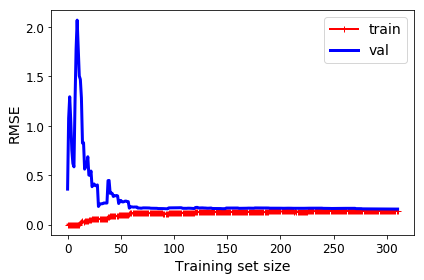

In [61]:
plot_learning_curves(lin_reg, major_el, major_el_labels, major_el_test, major_el_test_labels)
save_fig("linear_learning_curves")

Saving figure polynomial_learning_curves


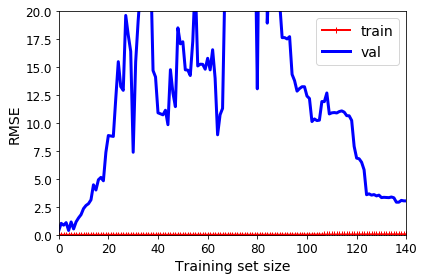

In [64]:
plot_learning_curves(poly_lin_reg, major_el_poly, major_el_labels, major_el_test_poly, major_el_test_labels)
plt.axis([0, 140, 0, 20])
save_fig("polynomial_learning_curves")

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Saving figure regularized_polynomial_learning_curves


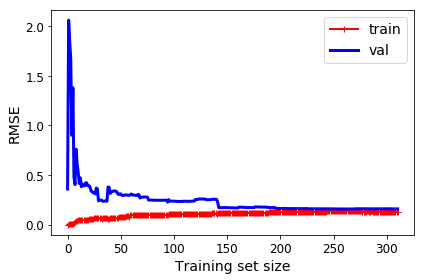

In [65]:
plot_learning_curves(elastic_net, major_el_poly, major_el_labels, major_el_test_poly, major_el_test_labels)
save_fig("regularized_polynomial_learning_curves")